In [9]:
%matplotlib inline
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
logical_gpus = tf.config.list_logical_devices('GPU')
print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

1 Physical GPUs, 1 Logical GPUs


In [3]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [4]:
PATH_TO_LABELS = 'C:\Tensorflow\models\\research\object_detection\data\mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

COCO17_HUMAN_POSE_KEYPOINTS = [(0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (7, 9), (6, 8), (8, 10), (5, 6), (5, 11), (6, 12), (11, 12), (11, 13), (13, 15), (12, 14), (14, 16)]

In [5]:
img = cv2.imread("test2.jpg")
image_tensor = tf.convert_to_tensor(img)
image_tensor = image_tensor[tf.newaxis, ...]

In [6]:
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/d0/1")

In [7]:
detector_output = detector(image_tensor)

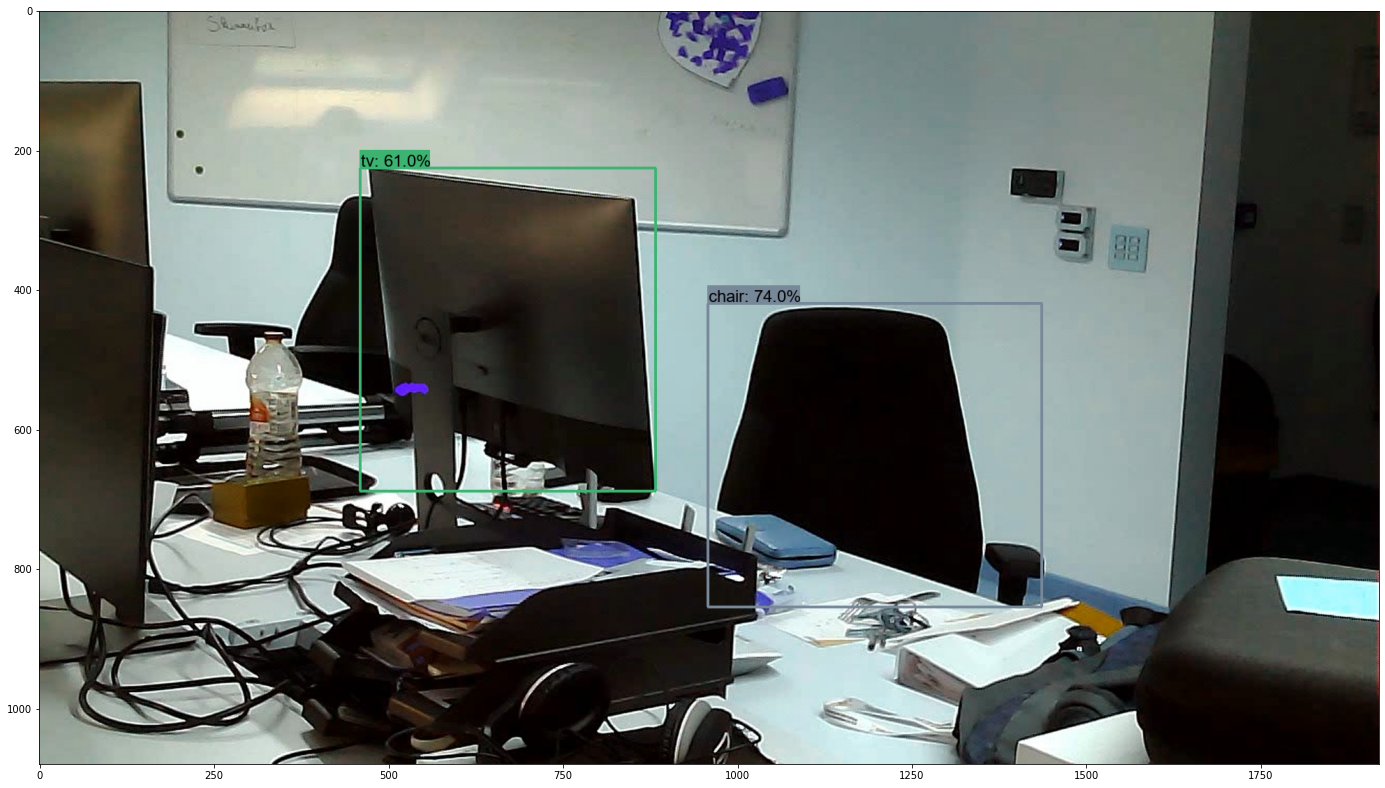

In [11]:
label_id_offset = 0
image_np_with_detections = img.copy()

# Use keypoints if available in detections
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in detector_output:
  keypoints = detector_output['detection_keypoints'][0]
  keypoint_scores = detector_output['detection_keypoint_scores'][0]

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detector_output['detection_boxes'][0],
      (detector_output['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detector_output['detection_scores'][0],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.60,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections)
plt.show()